In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import seaborn as sns
import string
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec

In [85]:
topic_result = pd.read_csv("BERT_result/distil_result.csv")
topic_result_year = pd.read_csv("BERT_result/distil_topics_per_year_new.csv")
topic_result_year = topic_result_year.set_index("Year")
topic_result_year.loc[2020,:] = len(topic_result_year.columns)*[0] # fill 2020 as zeros
topic_result_year = topic_result_year.sort_index()
intertopic_map = pd.read_csv("BERT_result/distil_intertopic_new.csv")

In [87]:
all_events = pd.read_csv("../../all_side_events_complete_lang.csv")
all_events_count = all_events.groupby(["Year"]).count()[["Code"]]
all_events_count.loc[2020,:] = len(all_events_count.columns)*[0] # fill 2020 as zeros
all_events_count = all_events_count.sort_index()

In [119]:
len(all_events)

4688

In [150]:
cohost_data = pd.read_csv("../../affiliation/event_hosts.csv")
cohost_data

,Unnamed: 0,all_events,Co-hosted,Individual
0,COP09,113,0,113
1,COP10,106,0,106
2,COP11,157,0,157
3,COP12,125,0,125
4,COP13,202,0,202
5,COP14,198,0,198
6,COP15,303,0,303
7,COP16,239,0,239
8,COP17,227,91,136
9,COP18,215,84,131


In [189]:
topics = [ 1,  2, 41, 61, 62, 19]
color_dict = {1:"orange",2:"blue", 41:"skyblue", 
              61:"purple", 62:"dodgerblue",19:"lightcoral"}
label_df = pd.DataFrame(data={"index":topics, "label":['Food agriculture systems','Renewable energy','Bioenergy','Nuclear energy','Energy poverty','Fossil fuel'],
                             "x":[12,11,11,11,11,11],"y":[-3,20,17,14,11,8]})
label_df

,index,label,x,y
0,1,Food agriculture systems,12,-3
1,2,Renewable energy,11,20
2,41,Bioenergy,11,17
3,61,Nuclear energy,11,14
4,62,Energy poverty,11,11
5,19,Fossil fuel,11,8


C:\Users\jx920\Anaconda3\envs\py310\lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\jx920\Anaconda3\envs\py310\lib\site-packages\matplotlib\text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
C:\Users\jx920\Anaconda3\envs\py310\lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
C:\Users\jx920\Anaconda3\envs\py310\lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) in

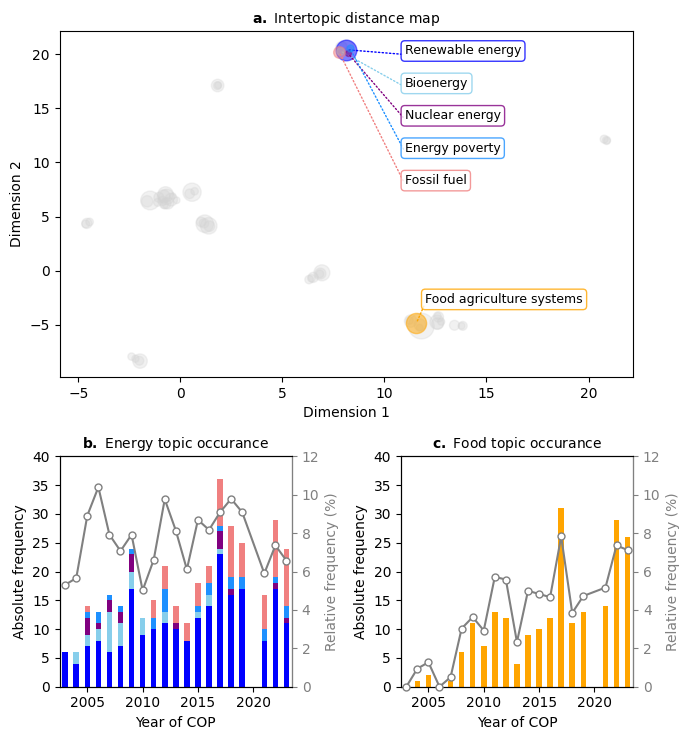

In [215]:
fig ,axes = plt.subplots(2,2,figsize=(7,7.5),gridspec_kw=dict(height_ratios=[1.5, 1]))
#fig.subplots_adjust(wspace=0.5,hspace=0.6)
food_topic = [1]
energy_topic = [2, 41, 61, 62, 19]

"""
this_ax = axes[0,0]
cohost_data[["Co-hosted","Individual"]].plot(kind='bar', stacked=True,ax=this_ax,colormap=colors.ListedColormap(["gray","lightgray"]))
this_ax.legend(loc="upper left",frameon=False,fontsize=9)
x_ticks = np.arange(4)*5+1
x_tick_labels = np.arange(4)*5+10
this_ax.set_xticks(x_ticks,x_tick_labels,rotation=0)
this_ax.set_xlabel("COP")
this_ax.set_ylabel("Number of events")
this_ax.set_title(r"$\bf{a.}$ All events",fontsize=10)
"""

#this_ax =  plt.subplot(2, 2, [1,2])
gs = axes[0,0].get_gridspec()
for ax in axes[0,:]:
    ax.remove()
this_ax = fig.add_subplot(gs[0, :])
intertopic_Not = intertopic_map[intertopic_map.index.isin(topics)==False]
this_ax.scatter(x=intertopic_Not["x"],y=intertopic_Not["y"],s=intertopic_Not["size"],c="lightgrey",alpha=0.3)
for i in topics:
    intertopic_topic = intertopic_map[intertopic_map.index==i]
    label_topic = label_df[label_df["index"]==i]
    this_ax.scatter(x=intertopic_topic["x"],y=intertopic_topic["y"],s=intertopic_topic["size"],c=color_dict[i],alpha=0.5)
    this_ax.text(label_topic["x"],label_topic["y"],label_topic["label"].iloc[0], horizontalalignment='left',fontsize=9,color="black",
                    bbox=dict(facecolor='white', edgecolor=color_dict[i],boxstyle='round',alpha=0.8))
    this_ax.annotate(text="", xy=(label_topic["x"],label_topic["y"]),xytext=(intertopic_topic["x"],intertopic_topic["y"]), 
                     arrowprops=dict(arrowstyle='-',color=color_dict[i],lw=1,linestyle=":"),zorder=1)
this_ax.set_xlabel("Dimension 1")
this_ax.set_ylabel("Dimension 2")
this_ax.set_title(r"$\bf{a.}$ Intertopic distance map",fontsize=10)

this_ax = plt.subplot(2, 2, 4)
twin_ax_0 = this_ax.twinx()
food_plot_data = topic_result_year[np.array(food_topic, dtype=str)]
food_plot_data.plot(kind='bar', stacked=True,ax=this_ax,colormap=colors.ListedColormap(list(color_dict.values())),legend = None)
this_ax.set_title(r"$\bf{c.}$ Food topic occurance",fontsize=10)

this_ax = plt.subplot(2,2,3)
twin_ax_1 = plt.subplot(2,2,3).twinx()
energy_plot_data = topic_result_year[np.array(energy_topic, dtype=str)]
energy_plot_data.plot(kind='bar', stacked=True,ax=this_ax,colormap=colors.ListedColormap([color_dict[e] for e in energy_topic]),legend = None)
this_ax.set_title(r"$\bf{b.}$ Energy topic occurance",fontsize=10)

plt.subplot(2,2,1).set_axis_off()
plt.subplot(2,2,2).set_axis_off()
all_events_count["food"] = food_plot_data
all_events_count["energy"] = energy_plot_data.sum(axis=1)
all_events_count["food_percent"] = all_events_count["food"]/all_events_count["Code"]*100
all_events_count["energy_percent"] = all_events_count["energy"]/all_events_count["Code"]*100
all_events_count = all_events_count.dropna()
twin_ax_0.plot(all_events_count.index-2003, all_events_count["food_percent"],color="gray", marker="o",
         markeredgecolor="gray",markerfacecolor="white",ls="-",markersize=5,zorder=20, clip_on=False)
twin_ax_1.plot(all_events_count.index-2003, all_events_count["energy_percent"],color="gray", marker="o",
         markeredgecolor="gray",markerfacecolor="white",ls="-",markersize=5,zorder=20, clip_on=False)

for ax_j in [plt.subplot(2,2,3),plt.subplot(2, 2, 4)]:
    ax_j.set_ylabel("Absolute frequency")
    ax_j.set_xlabel("Year of COP")
    x_ticks = np.arange(4)*5+2
    ax_j.set_xticks(x_ticks)
    ax_j.set_ylim([0,40])
    ax_j.xaxis.set_tick_params(rotation=0)

for ax2 in [twin_ax_1,twin_ax_0]:
    ax2.set_ylabel("Relative frequency (%)",color="gray")
    ax2.spines["right"].set_edgecolor("gray")
    ax2.tick_params(axis='y', colors="gray")
    ax2.set_ylim([0,12])

plt.tight_layout()

plt.savefig("topic_summary_food_energy_distil.png",dpi=600, bbox_inches='tight')
plt.savefig("topic_summary_food_energy_distil.pdf", bbox_inches='tight')